# UNEMPLOYMENT RATE PREDICTION IN INDIA USING PYTHON

In [1]:
#Packages for plotting india map
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
#PACKAGES FOR DATA PROCESSING AND GRAPHS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#IMORTING DATA
data= pd.read_csv('Unemployment_Rate_upto_11_2020.csv',delimiter=',',skiprows=0,low_memory=False)
data.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Location  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [4]:
# Converting "Date" column to Datetime format
data[' Date']= pd.to_datetime(data[' Date'],dayfirst=True)

#Converting 'Frequency' and 'Region' columns to categorical data type
data[' Frequency'] = data[' Frequency'].astype('category')
data['Region'] = data['Region'].astype('category')

In [5]:
data['Month']= data[' Date'].dt.month

In [6]:
#converting 'month' to integer format
data['Month_int'] = data['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
data['Month_name'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])
#Dropping the original 'Month' column
data.drop(columns='Month', inplace=True)
data['Month'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [7]:
# divided the Estimated employed by 100,000 for better aproximation 
data[' Estimated Employed']=data[' Estimated Employed']/100000

# LOCATION OF INDIA ON WORLD MAP (IN RED)

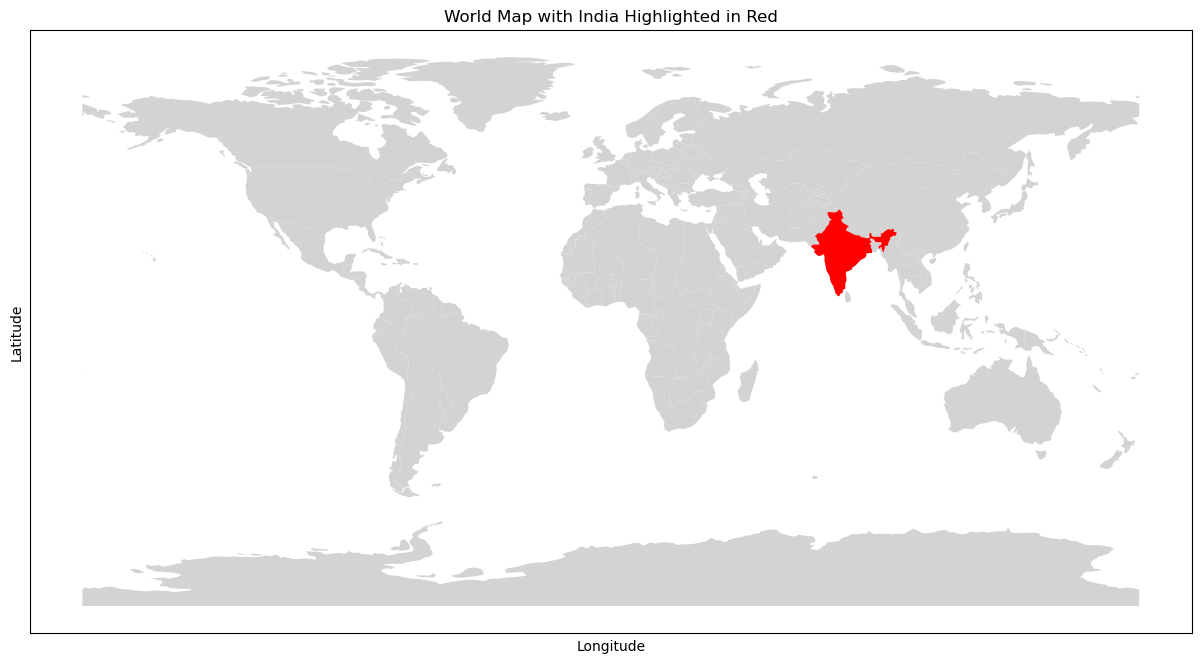

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with India colored red
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Default color for all countries
world[world.name == "India"].plot(ax=ax, color='red')  # Color India red

# Set title and axis labels
plt.title('World Map with India Highlighted in Red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove x and y axis for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

plt.show()


# Estimated Employed by Location

In [9]:
# Correcting the column name and grouping the data by 'Location'
# Summing up the ' Estimated Employed' values
location_employment = data.groupby('Location')[' Estimated Employed'].sum().reset_index()

# Display the summed up employment figures for each location
location_employment


Location   Estimated Employed
0       East           7840.94676
1      North          10327.26546
2  Northeast           1374.50010
3      South           8424.35360
4       West           9311.75636

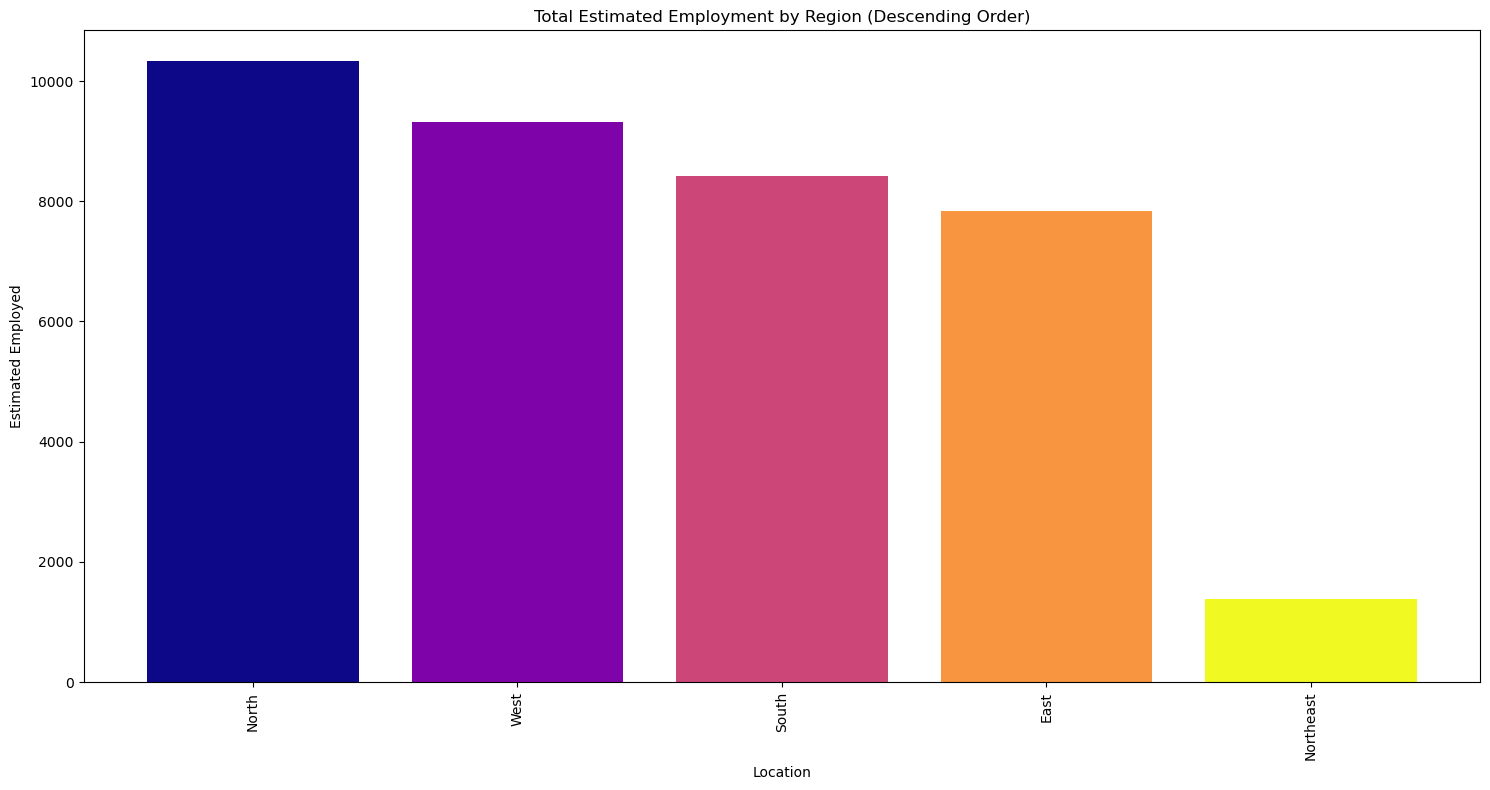

In [10]:
# Grouping the data by 'location' instead and summing up the ' Estimated Employed' values
location1_employment = data.groupby('Location')[' Estimated Employed'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(location1_employment))

# Plotting the bar graph for location-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(location1_employment['Location'], location1_employment[' Estimated Employed'], color=[palette(i) for i in range(len(location1_employment))])

plt.title('Total Estimated Employment by Region (Descending Order)')
plt.xlabel('Location')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Estimated Employed by Region

In [11]:
# Correcting the column name and grouping the data by 'Location'
# Summing up the ' Estimated Employed' values
region1_employment = data.groupby('Region')[' Estimated Employed'].sum().reset_index()

# Display the summed up employment figures for each location
region1_employment.head()

Region   Estimated Employed
0  Andhra Pradesh           1542.54800
1           Assam           1081.02755
2           Bihar           2360.68280
3    Chhattisgarh            842.13492
4           Delhi            463.28219

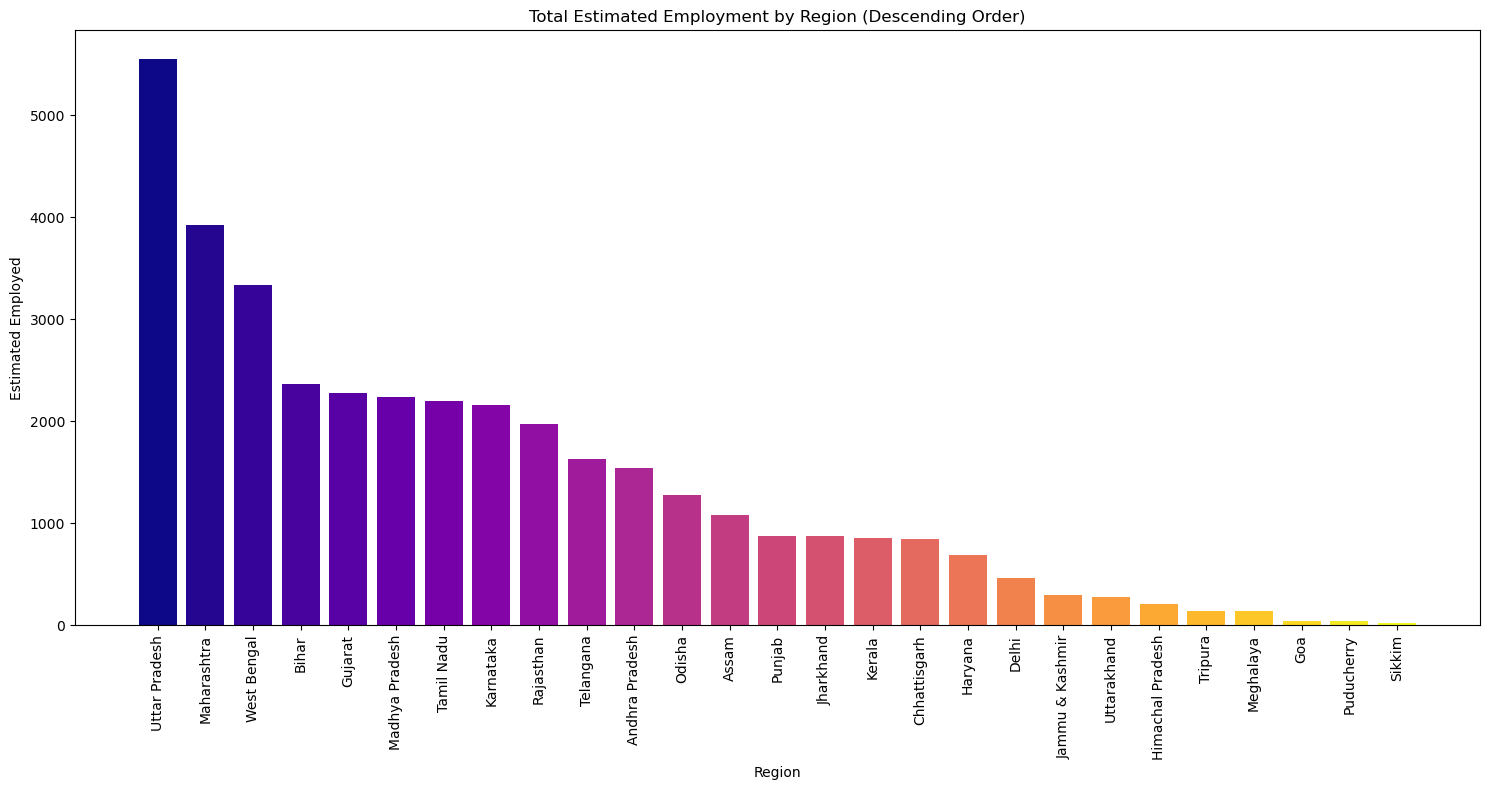

In [12]:
# Grouping the data by 'Region' and summing up the ' Estimated Employed' values
region1_employment = data.groupby('Region')[' Estimated Employed'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(region1_employment))

# Plotting the bar graph for region-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(region1_employment['Region'], region1_employment[' Estimated Employed'], color=[palette(i) for i in range(len(region1_employment))])

plt.title('Total Estimated Employment by Region (Descending Order)')
plt.xlabel('Region')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()


# Estimated Employed by Month

In [13]:
# Correcting the column name and grouping the data by 'month'
# Summing up the ' Estimated Employed' values
month1_employment = data.groupby('Month')[' Estimated Employed'].sum().reset_index()

# Display the summed up employment figures for each month
month1_employment

Month   Estimated Employed
0   Apr           2748.25174
1   Aug           3895.84135
2   Feb           4026.94917
3   Jan           4065.67194
4   Jul           3892.86580
5   Jun           3741.49633
6   Mar           3925.43817
7   May           3106.99661
8   Oct           3936.59474
9   Sep           3938.71643

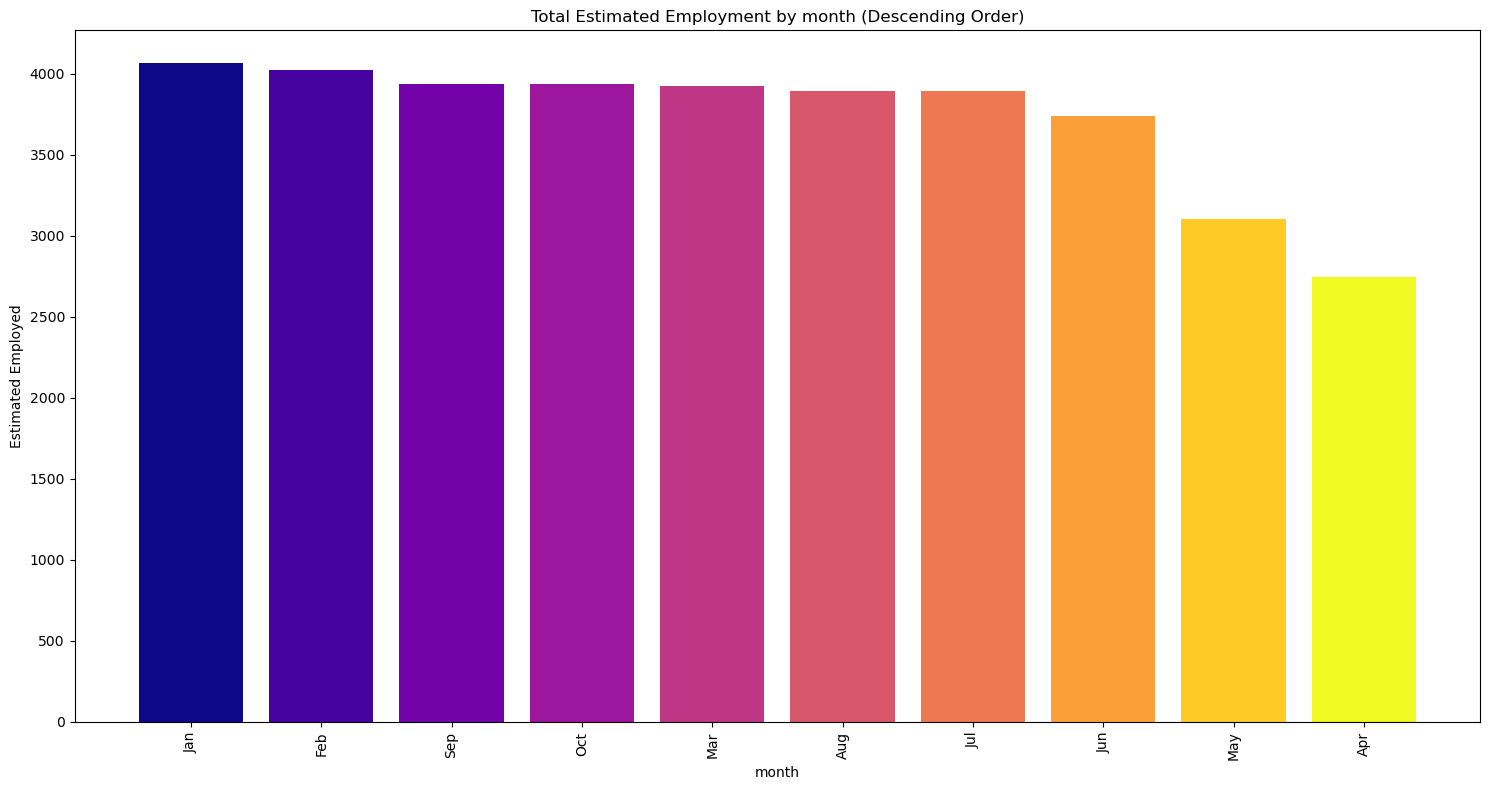

In [14]:
# Grouping the data by 'month' and summing up the ' Estimated Employed' values
month1_employment = data.groupby('Month')[' Estimated Employed'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(month1_employment))

# Plotting the bar graph for month-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(month1_employment['Month'], month1_employment[' Estimated Employed'], color=[palette(i) for i in range(len(month1_employment))])

plt.title('Total Estimated Employment by month (Descending Order)')
plt.xlabel('month')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Estimated Unemployment Rate by Region

In [15]:
# Correcting the column name and grouping the data by 'region'
# Summing up the ' Estimated unemployedment' values
region2_unemployment = data.groupby('Region')[' Estimated Unemployment Rate (%)'].sum().reset_index()

# Display the summed up unemployment figures for each region

region2_unemployment.head()

Region   Estimated Unemployment Rate (%)
0  Andhra Pradesh                             86.64
1           Assam                             48.56
2           Bihar                            194.71
3    Chhattisgarh                             78.19
4           Delhi                            184.14

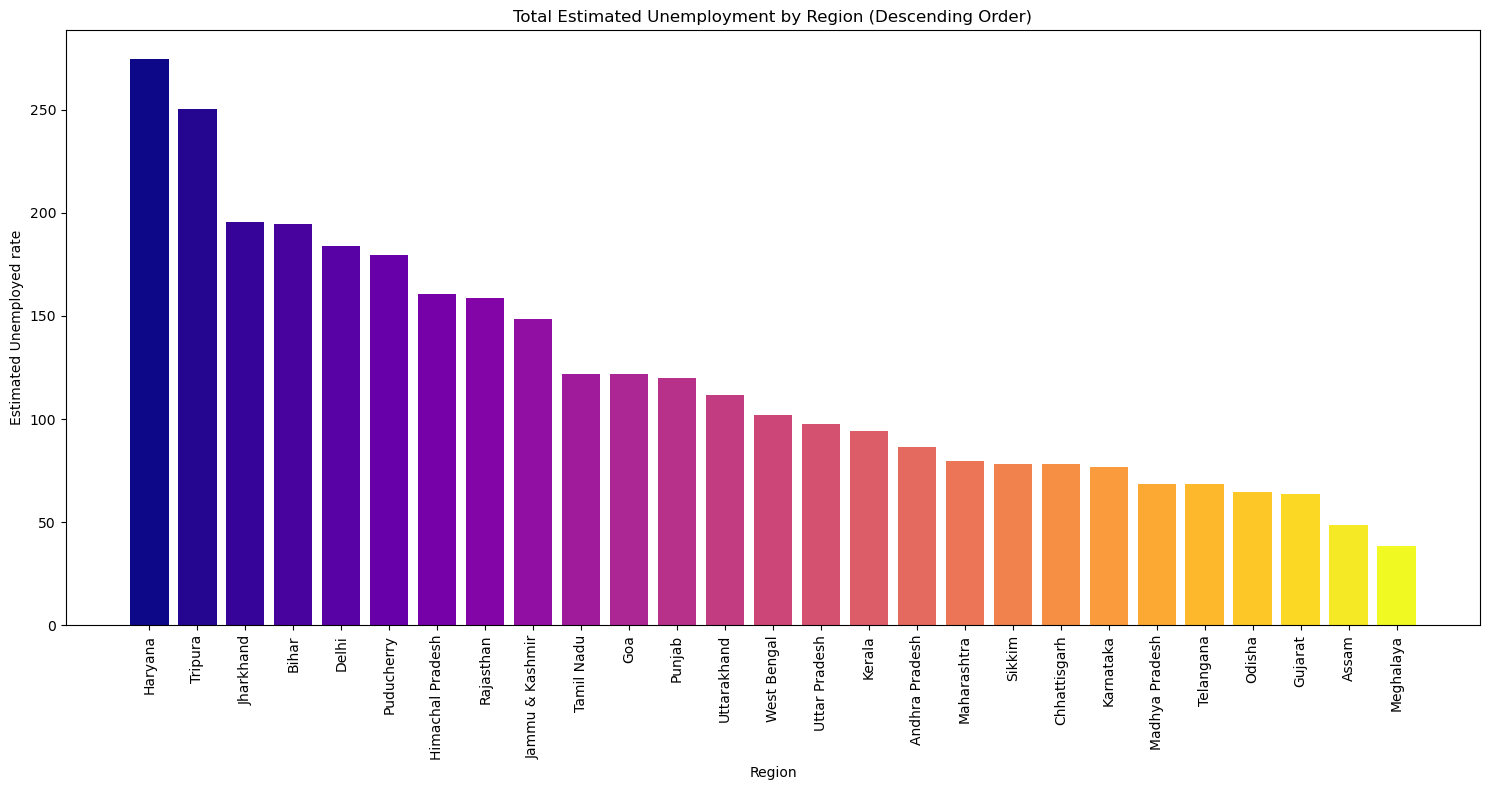

In [16]:
# Grouping the data by 'Region' and summing up the ' Estimated unemployment rate' values
region2_employment = data.groupby('Region')[' Estimated Unemployment Rate (%)'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(region2_employment))

# Plotting the bar graph for region-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(region2_employment['Region'], region2_employment[' Estimated Unemployment Rate (%)'], color=[palette(i) for i in range(len(region2_employment))])

plt.title('Total Estimated Unemployment by Region (Descending Order)')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployed rate')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Estimated Unemployment Rate by Location

In [17]:
# Correcting the column name and grouping the data by 'Location'
# Summing up the ' Estimated Employed' values
loc_unemployment = data.groupby('Location')[' Estimated Unemployment Rate (%)'].sum().reset_index()

# Display the summed up employment figures for each location
loc_unemployment.head()

Location   Estimated Unemployment Rate (%)
0       East                            556.64
1      North                           1255.28
2  Northeast                            416.11
3      South                            627.28
4       West                            411.95

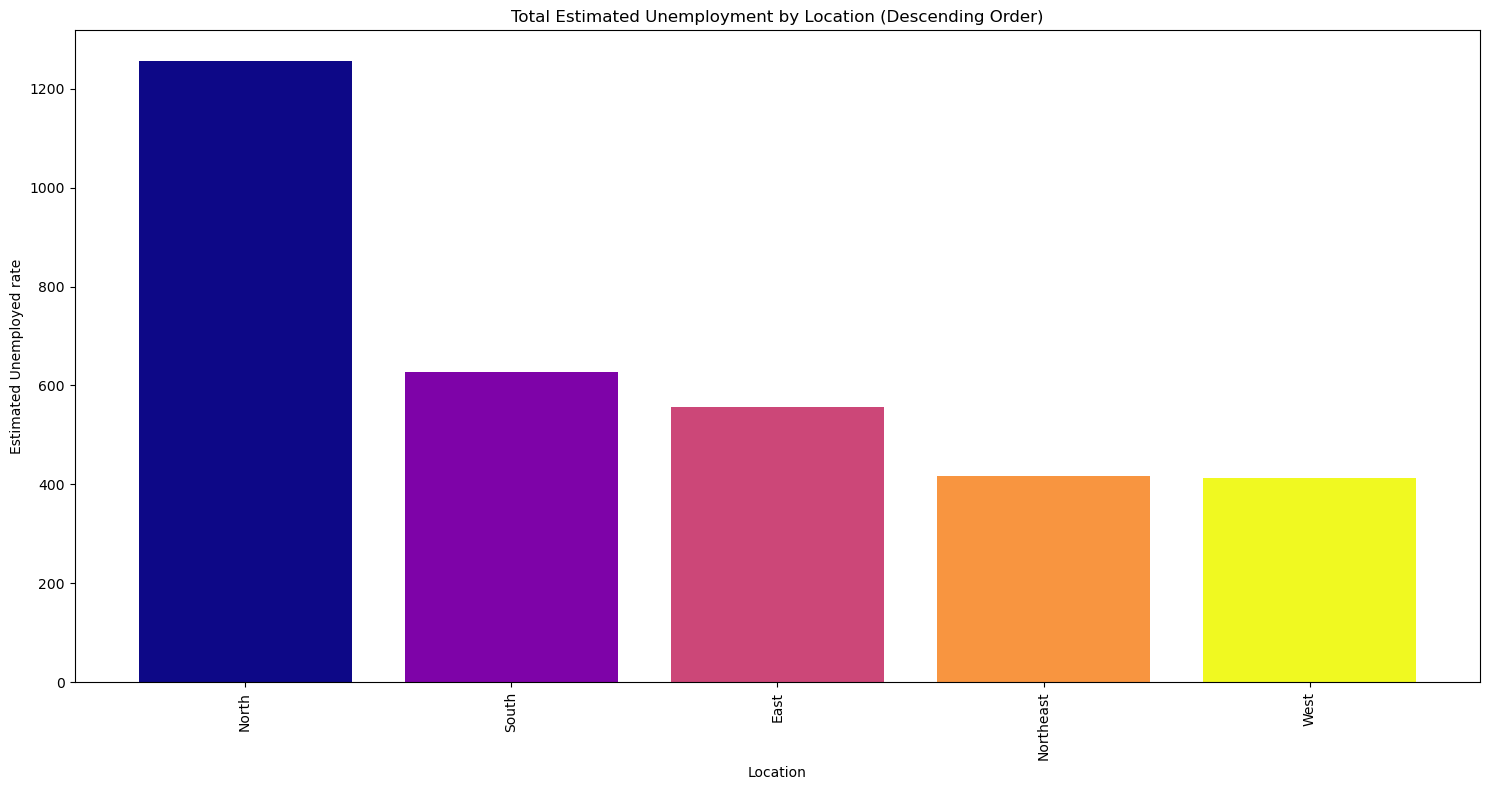

In [18]:
# Grouping the data by 'Location' and summing up the ' Estimated unemployment' values
loc_employment = data.groupby('Location')[' Estimated Unemployment Rate (%)'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(loc_employment))

# Plotting the bar graph for location-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(loc_employment['Location'], loc_employment[' Estimated Unemployment Rate (%)'], color=[palette(i) for i in range(len(loc_employment))])

plt.title('Total Estimated Unemployment by Location (Descending Order)')
plt.xlabel('Location')
plt.ylabel('Estimated Unemployed rate')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Estimated Unemployment by month

In [19]:
# Correcting the column name and grouping the data by 'month'
# Summing up the ' Estimated Employed' values
month2_unemployment = data.groupby('Month')[' Estimated Unemployment Rate (%)'].sum().reset_index()

# Display the summed up employment figures for each location
month2_unemployment

Month   Estimated Unemployment Rate (%)
0   Apr                            578.14
1   Aug                            278.46
2   Feb                            240.92
3   Jan                            239.11
4   Jul                            265.53
5   Jun                            294.60
6   Mar                            291.13
7   May                            627.60
8   Oct                            216.71
9   Sep                            235.06

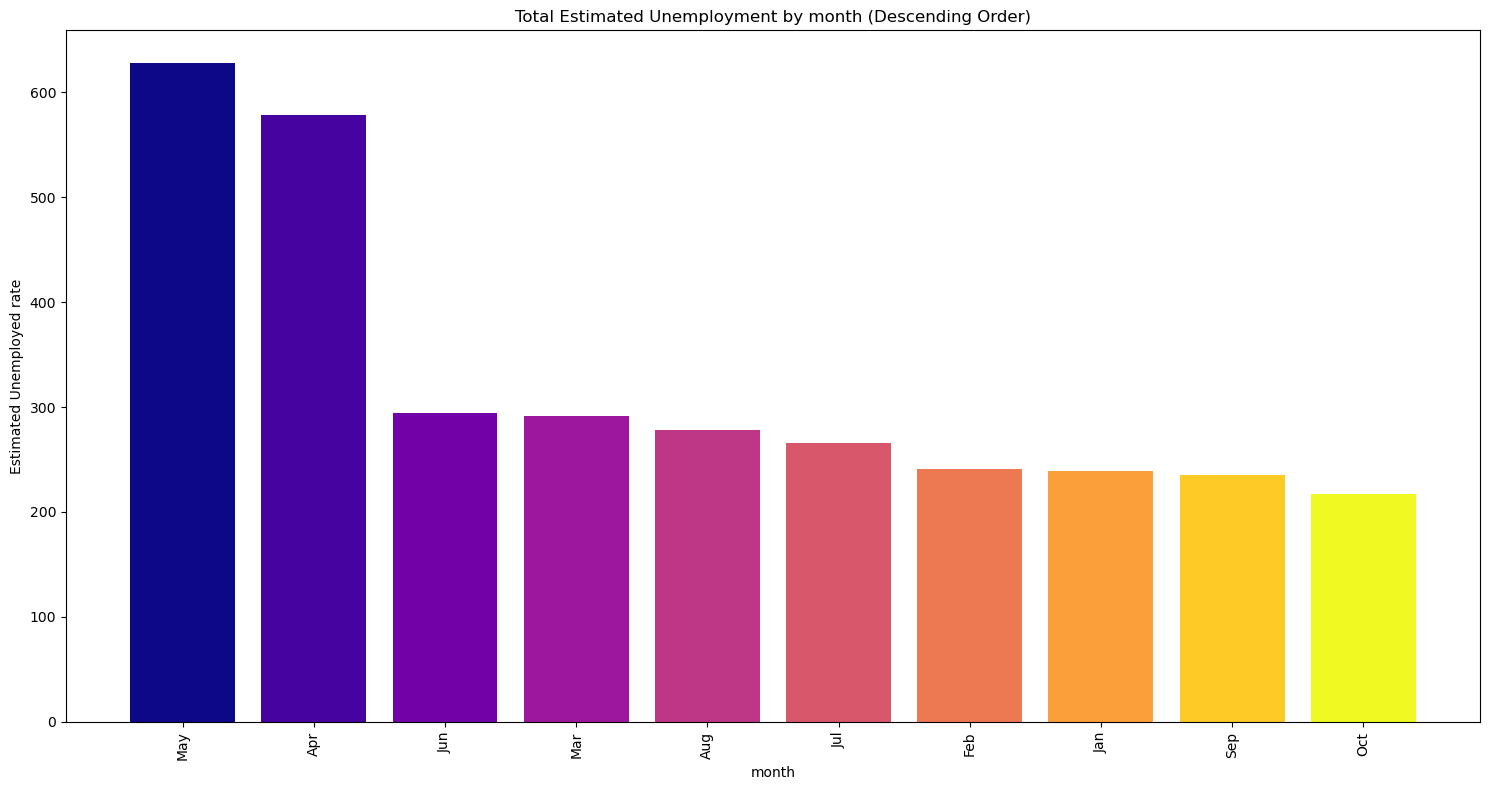

In [20]:
# Grouping the data by 'month' and summing up the ' Estimated unemployment rate' values
month2_unemployment = data.groupby('Month')[' Estimated Unemployment Rate (%)'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(month2_unemployment))

# Plotting the bar graph for region-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(month2_unemployment['Month'], month2_unemployment[' Estimated Unemployment Rate (%)'], color=[palette(i) for i in range(len(month2_unemployment))])

plt.title('Total Estimated Unemployment by month (Descending Order)')
plt.xlabel('month')
plt.ylabel('Estimated Unemployed rate')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Estimated Labour Participation Rate by Region

In [21]:
# Correcting the column name and grouping the data by 'region'
# Summing up the ' Estimated Employed' values
reg_part = data.groupby('Region')[' Estimated Labour Participation Rate (%)'].sum().reset_index()

# Display the summed up employment figures for each location
reg_part.head()

Region   Estimated Labour Participation Rate (%)
0  Andhra Pradesh                                    389.62
1           Assam                                    434.98
2           Bihar                                    371.73
3    Chhattisgarh                                    411.61
4           Delhi                                    358.57

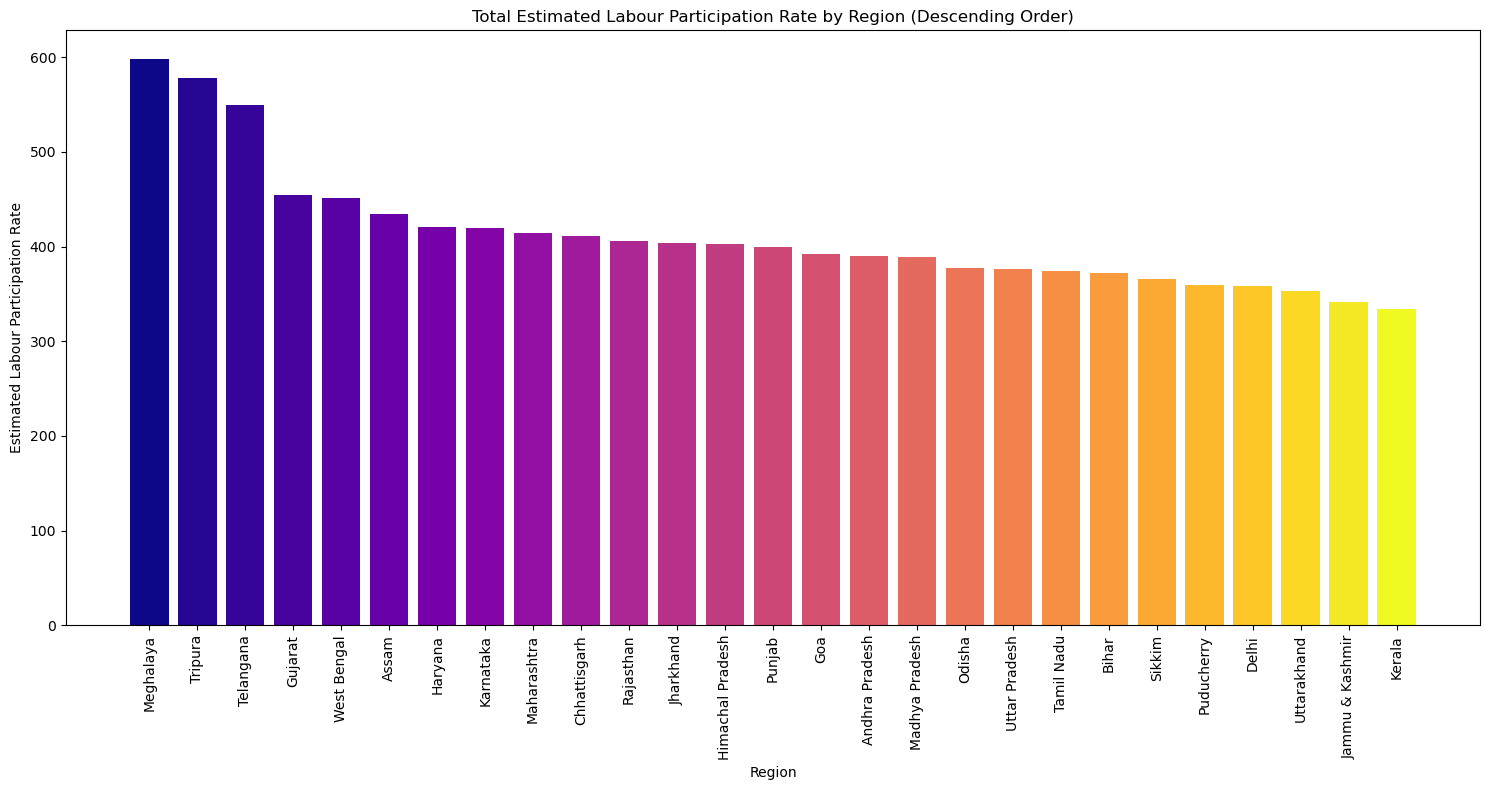

In [22]:
# Grouping the data by 'Region' and summing up the Estimated Labour Participation Rate values
reg_unemployment = data.groupby('Region')[' Estimated Labour Participation Rate (%)'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(reg_unemployment))

# Plotting the bar graph for region-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(reg_unemployment['Region'], reg_unemployment[' Estimated Labour Participation Rate (%)'], color=[palette(i) for i in range(len(reg_unemployment))])

plt.title('Total Estimated Labour Participation Rate by Region (Descending Order)')
plt.xlabel('Region')
plt.ylabel('Estimated Labour Participation Rate')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Estimated Labour Participation Rate by Location

In [23]:
# Correcting the column name and grouping the data by 'Location'
# Summing up the ' Estimated Employed' values
lo_part = data.groupby('Location')[' Estimated Labour Participation Rate (%)'].sum().reset_index()

# Display the summed up employment figures for each location
lo_part.head()

Location   Estimated Labour Participation Rate (%)
0       East                                   1604.35
1      North                                   3057.51
2  Northeast                                   1978.10
3      South                                   2426.17
4       West                                   2062.85

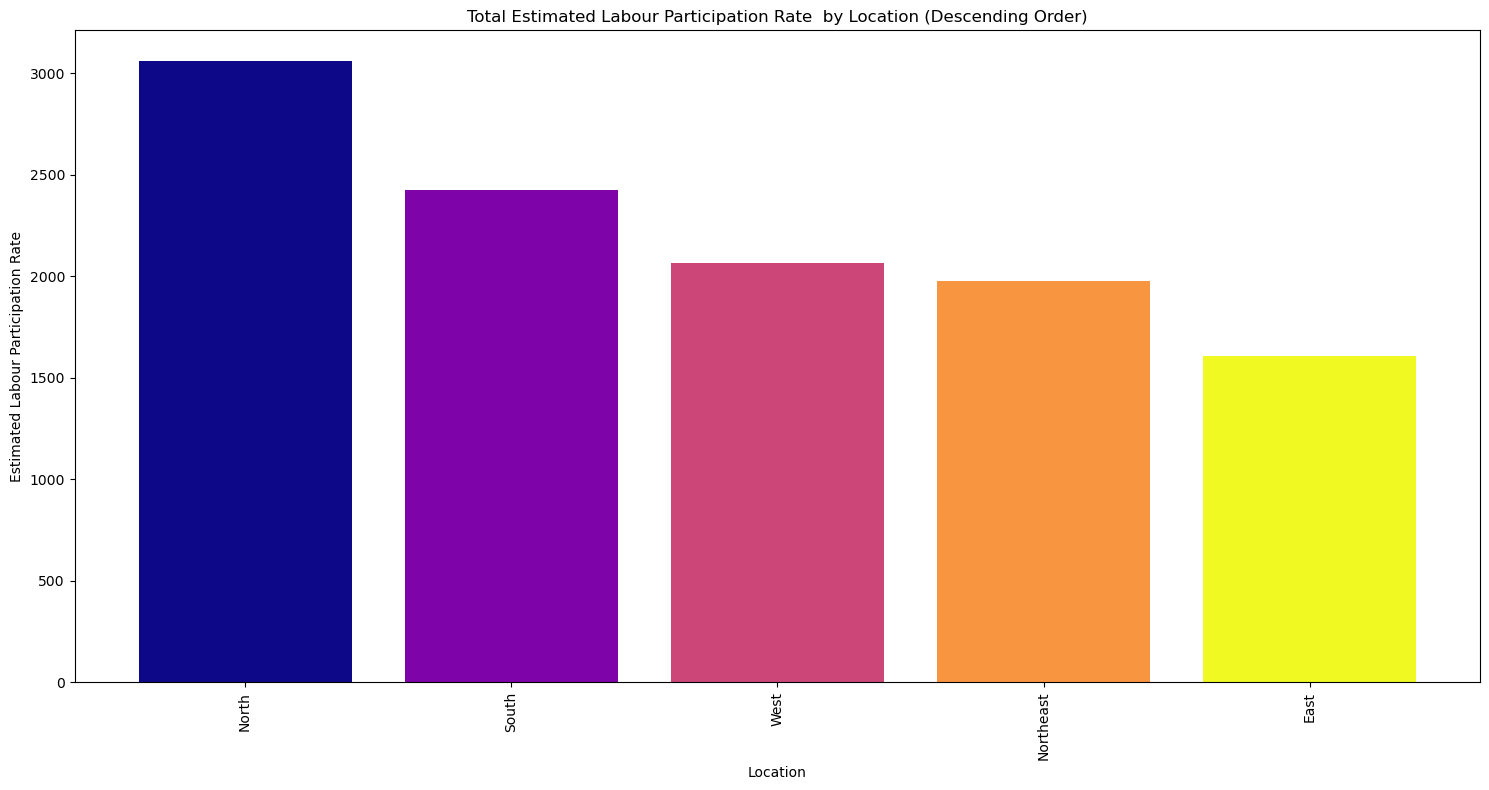

In [24]:
# Grouping the data by 'Location' and summing up the Estimated Labour Participation Rate values
loc_employment = data.groupby('Location')[' Estimated Labour Participation Rate (%)'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(loc_employment))

# Plotting the bar graph for region-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(loc_employment['Location'], loc_employment[' Estimated Labour Participation Rate (%)'], color=[palette(i) for i in range(len(loc_employment))])

plt.title('Total Estimated Labour Participation Rate  by Location (Descending Order)')
plt.xlabel('Location')
plt.ylabel('Estimated Labour Participation Rate')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Estimated Labour Participation Rate by month

In [25]:
# Summing up the ' Estimated Employed' values
m_part = data.groupby('Month')[' Estimated Labour Participation Rate (%)'].sum().reset_index()

# Display the summed up employment figures for each location
m_part.head()

Month   Estimated Labour Participation Rate (%)
0   Apr                                    917.73
1   Aug                                   1144.55
2   Feb                                   1148.70
3   Jan                                   1160.29
4   Jul                                   1141.42

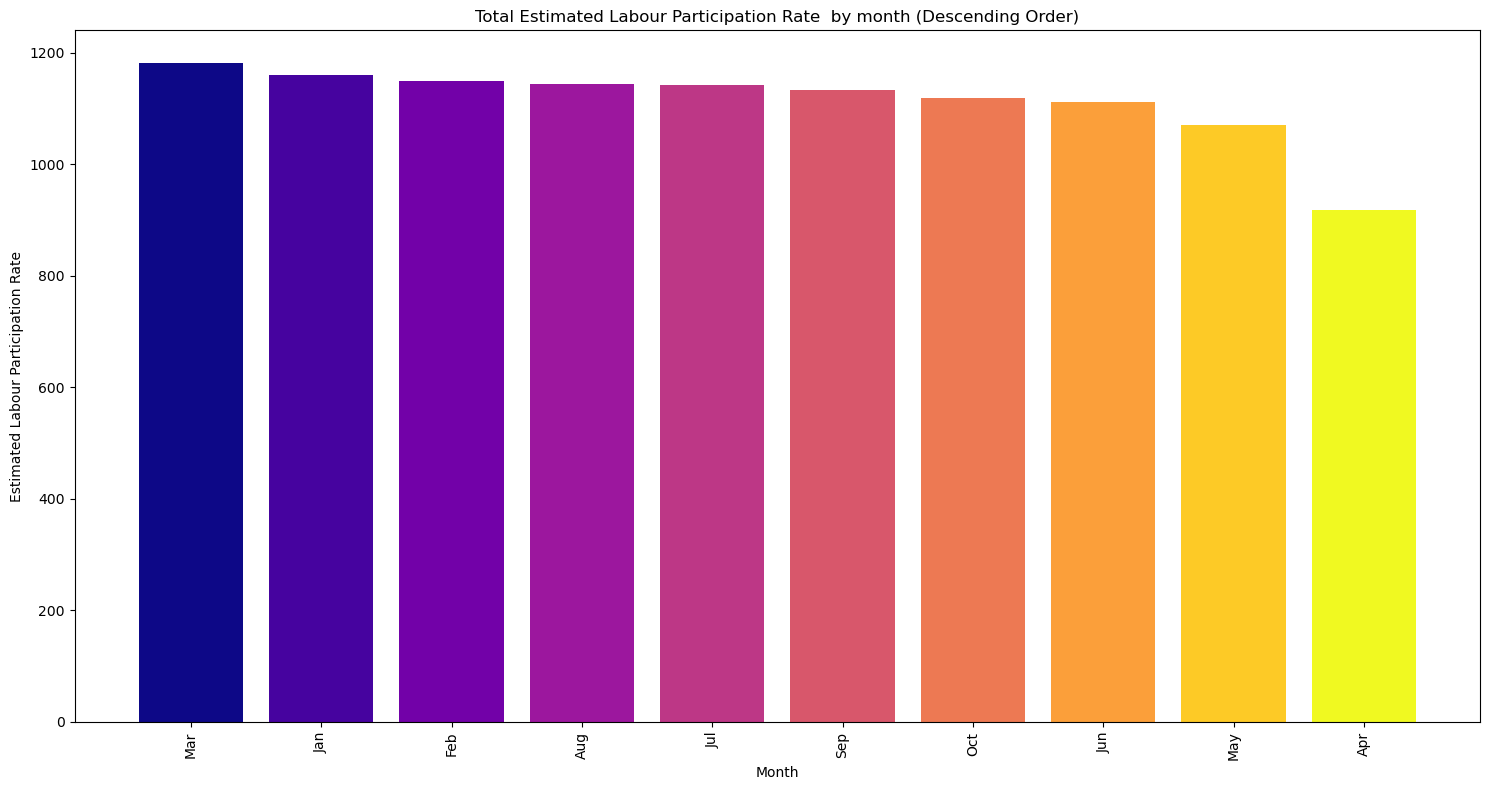

In [26]:
# Grouping the data by 'month' and summing up the Estimated Labour Participation Rate values
m_part = data.groupby('Month')[' Estimated Labour Participation Rate (%)'].sum().sort_values(ascending=False).reset_index()

# Creating a color palette with a distinct color for each bar
palette = plt.cm.get_cmap('plasma', len(m_part))

# Plotting the bar graph for region-wise estimated employment figures sorted in descending order
plt.figure(figsize=(15, 8))
bars = plt.bar(m_part['Month'], m_part[' Estimated Labour Participation Rate (%)'], color=[palette(i) for i in range(len(m_part))])

plt.title('Total Estimated Labour Participation Rate  by month (Descending Order)')
plt.xlabel('Month')
plt.ylabel('Estimated Labour Participation Rate')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show clearly
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

# Comparing Estimated Labour Participation Rate and Estimated Unemployment Rate by region

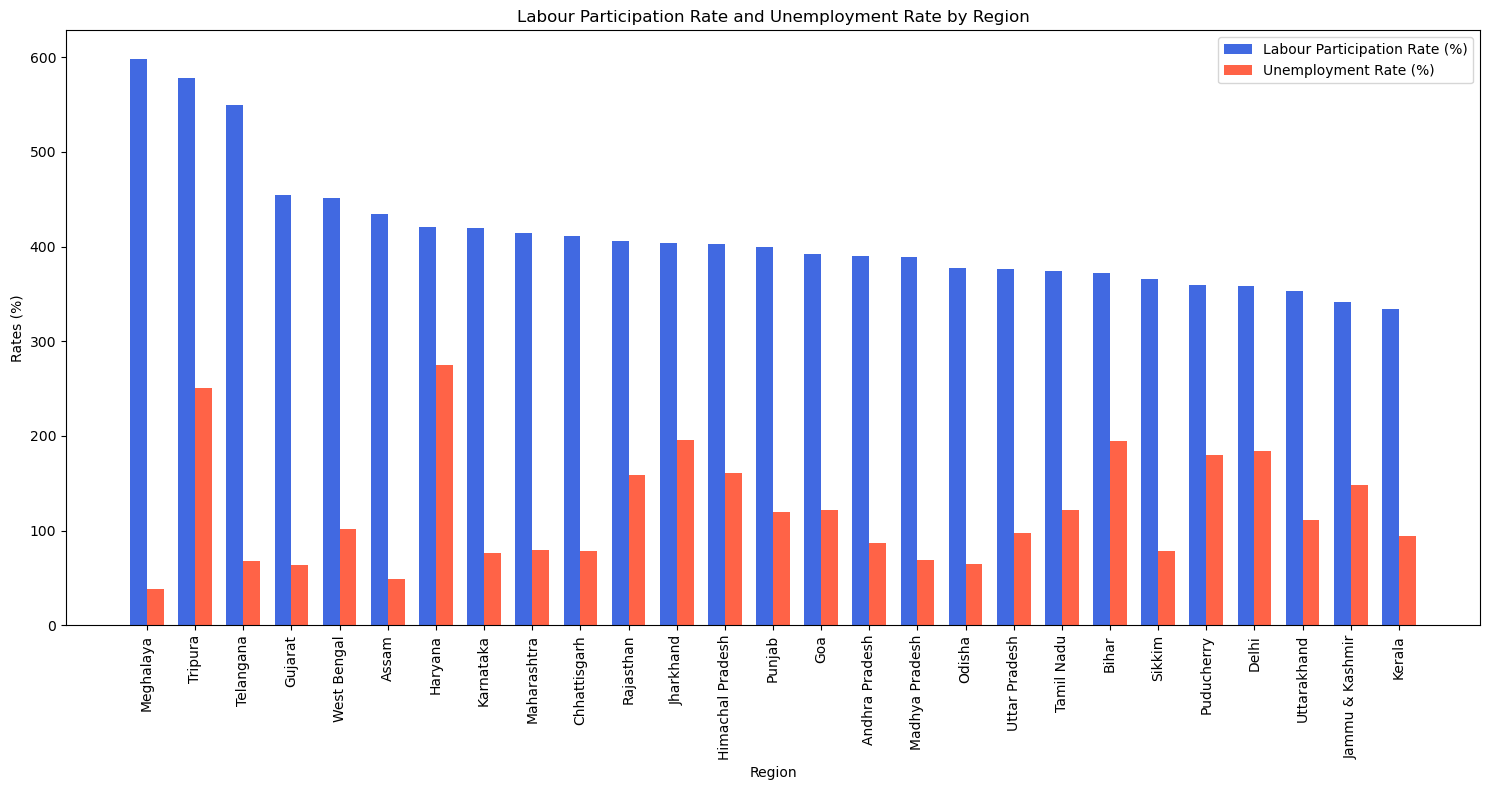

In [27]:
# Grouping the data by 'Region' and summing up both ' Estimated Labour Participation Rate (%)' and ' Estimated Unemployment Rate (%)' values
region_summary = data.groupby('Region').agg({
    ' Estimated Labour Participation Rate (%)': 'sum',
    ' Estimated Unemployment Rate (%)': 'sum'
}).sort_values(by=' Estimated Labour Participation Rate (%)', ascending=False).reset_index()

# Plotting the bar graph for region-wise sum of labour participation rate and unemployment rate
plt.figure(figsize=(15, 8))

# We need to plot two sets of bars, so we'll create an index for each set.
bar_width = 0.35  # width of the bars
index = np.arange(len(region_summary))

bar1 = plt.bar(index, region_summary[' Estimated Labour Participation Rate (%)'], bar_width,
               label='Labour Participation Rate (%)', color='royalblue')

bar2 = plt.bar(index + bar_width, region_summary[' Estimated Unemployment Rate (%)'], bar_width,
               label='Unemployment Rate (%)', color='tomato')

plt.xlabel('Region')
plt.ylabel('Rates (%)')
plt.title('Labour Participation Rate and Unemployment Rate by Region')
plt.xticks(index + bar_width / 2, region_summary['Region'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# comparing Estimated Labour Participation Rate  and Estimated Unemployment Rate  values by location

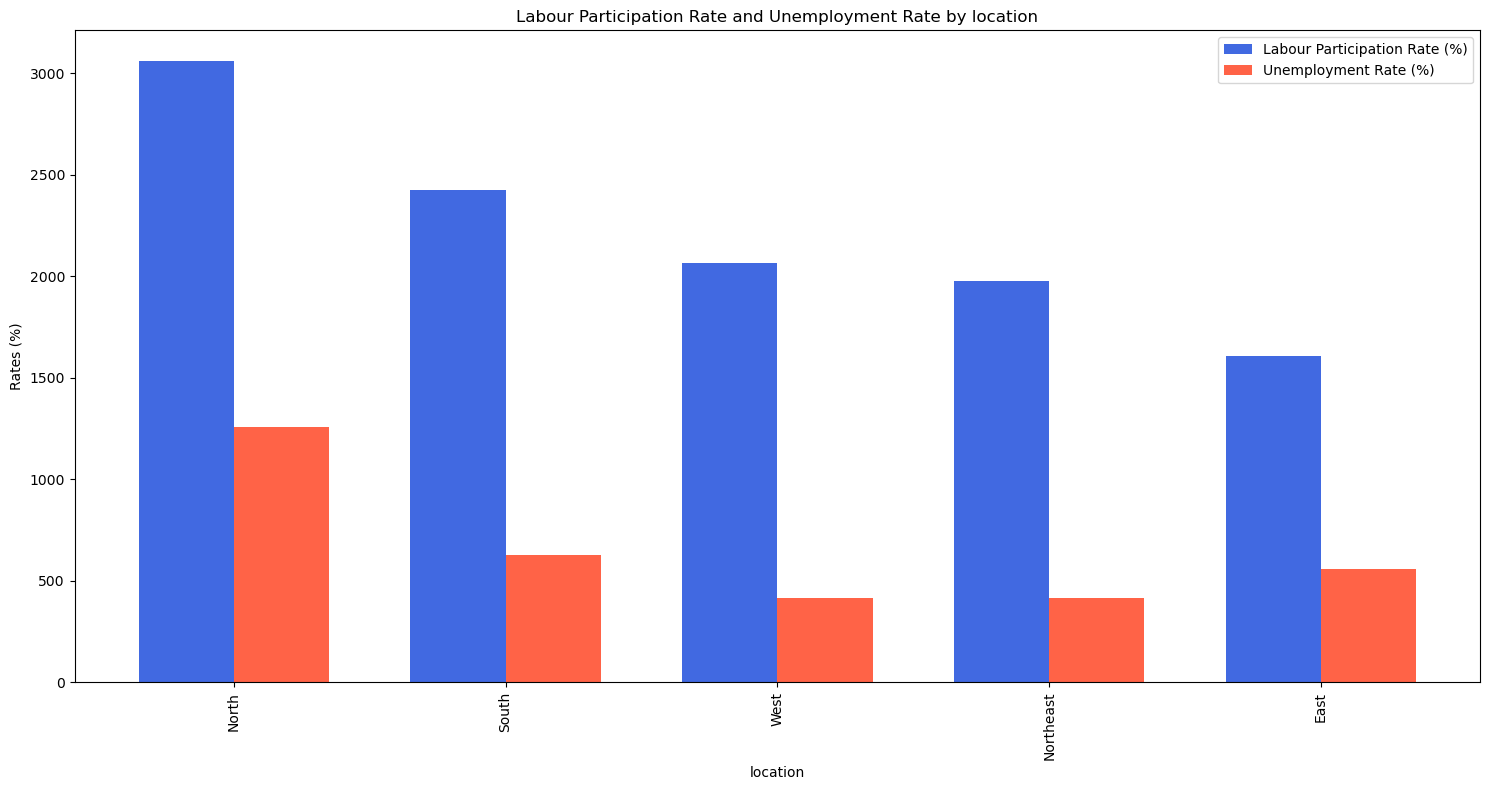

In [28]:
# Grouping the data by 'Location' and summing up both ' Estimated Labour Participation Rate (%)' 
# and ' Estimated Unemployment Rate (%)' values
region_summary = data.groupby('Location').agg({
    ' Estimated Labour Participation Rate (%)': 'sum',
    ' Estimated Unemployment Rate (%)': 'sum'
}).sort_values(by=' Estimated Labour Participation Rate (%)', ascending=False).reset_index()

# Plotting the bar graph for location-wise sum of labour participation rate and unemployment rate
plt.figure(figsize=(15, 8))

# We need to plot two sets of bars, so we'll create an index for each set.
bar_width = 0.35  # width of the bars
index = np.arange(len(region_summary))

bar1 = plt.bar(index, region_summary[' Estimated Labour Participation Rate (%)'], bar_width,
               label='Labour Participation Rate (%)', color='royalblue')

bar2 = plt.bar(index + bar_width, region_summary[' Estimated Unemployment Rate (%)'], bar_width,
               label='Unemployment Rate (%)', color='tomato')

plt.xlabel('location')
plt.ylabel('Rates (%)')
plt.title('Labour Participation Rate and Unemployment Rate by location')
plt.xticks(index + bar_width / 2, region_summary['Location'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_df = data[['Location','Month', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
unemplo = unemplo_df.groupby(['Location','Month'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Location','Month'], values=' Estimated Unemployment Rate (%)',
                  color_continuous_scale='Set1', title='Unemployment rate in each Region and Location',
                  height=650, template='ggplot2')
fig.show()

# Estimated Unemployment Rate using latitude and Longitude representation on the india map  across location and within months

In [30]:
#Impact of Lockdown on States Estimated Employed

fig = px.scatter_geo(data,'longitude', 'latitude', color="Location",
                     hover_name="Location", size=' Estimated Unemployment Rate (%)',
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Estimated Unemployment Rate across Location')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[10,30], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

# Estimated Employed using latitude and Longitude representation on the india map within months

In [31]:


fig = px.scatter_geo(data,'longitude', 'latitude', color="Location",
                     hover_name="Location", size=' Estimated Employed',
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Estimated Employed across Location')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[10,30], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

# Estimated Labour Participation Rate using latitue and Longitude representation on the india map within months

In [32]:
#

fig = px.scatter_geo(data,'longitude', 'latitude', color="Location",
                     hover_name="Location", size= ' Estimated Labour Participation Rate (%)',
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Estimated Labour Participation Rate across Location')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[10,30], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

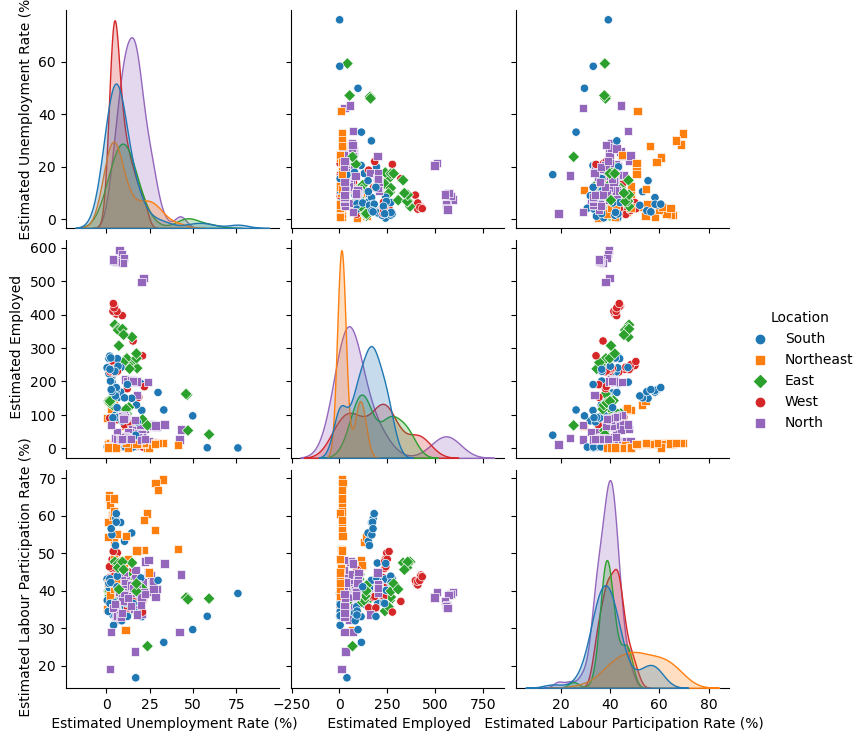

In [33]:

sns.pairplot(data, hue='Location', markers=["o", "s", "D"],vars=[ ' Estimated Unemployment Rate (%)',' Estimated Employed', ' Estimated Labour Participation Rate (%)'])
plt.show()

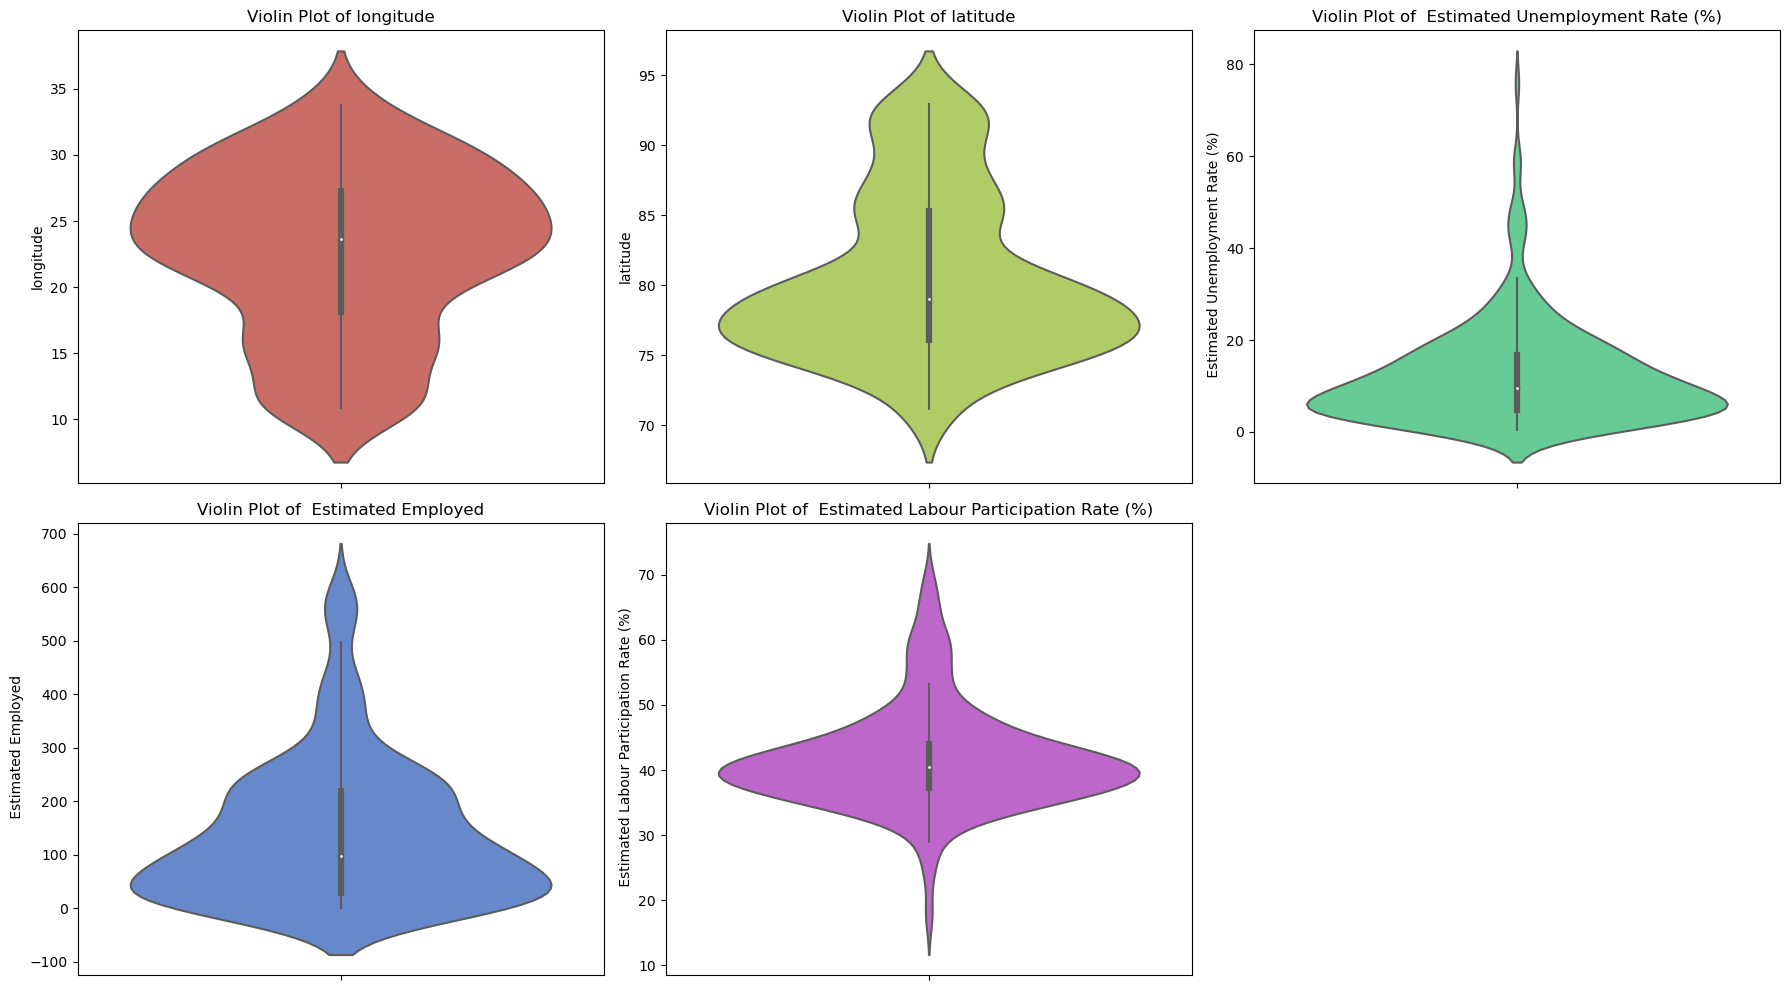

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
plt.figure(figsize=(18, 10))

# Creating a list of the columns to plot
columns_to_plot = [
    'longitude', 
    'latitude', 
    ' Estimated Unemployment Rate (%)', 
    ' Estimated Employed', 
    ' Estimated Labour Participation Rate (%)'
]

# Creating a violin plot for each column
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=data[column], color=sns.color_palette("hls", 5)[i])
    plt.title(f'Violin Plot of {column}')


# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

# BUILDING THE MODEL

In [35]:
#Libraries for building random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [37]:
data.drop(columns=['Region', ' Date', ' Frequency','Month_name','Month'],axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
features = ['Location']
le = LabelEncoder()
for feature in features:
    le.fit(data[feature].unique())
    data[feature] = le.transform(data[feature])
    print(feature, data[feature].unique())

Location [3 2 0 4 1]


## CHECKING THE IMPORTANCE OF THE VARIOUS VARIABLES

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Separate the target variable (Salary) and the features
X = data.drop(' Estimated Unemployment Rate (%)', axis=1)
y = data[' Estimated Unemployment Rate (%)']

# Initialize and train a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

Feature  Importance
0                        Estimated Employed    0.379882
1   Estimated Labour Participation Rate (%)    0.205184
3                                 longitude    0.135879
5                                 Month_int    0.117220
4                                  latitude    0.094084
2                                  Location    0.067752

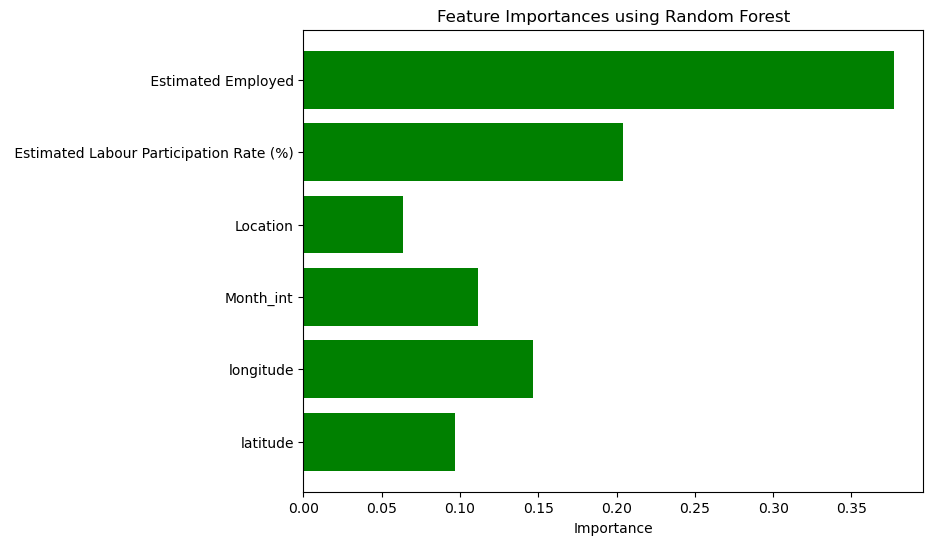

In [51]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define features and target variable
features = [' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Location', 'Month_int','longitude', 'latitude']
target = ' Estimated Unemployment Rate (%)'

# Prepare the data
X = data[features]
y = data[target]

# Train a Random Forest regressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = rf.feature_importances_

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, align='center', color='GREEN')
plt.xlabel('Importance')
plt.title('Feature Importances using Random Forest')
plt.gca().invert_yaxis()  # Display the feature with the highest importance at the top
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(' Estimated Unemployment Rate (%)', axis=1), data[' Estimated Unemployment Rate (%)'], test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the random forest model to the scaled training data
rf.fit(X_train, y_train)

# Predict on the scaled test set
y_pred_rf = rf.predict(X_test)

# Calculate performance metrics for the random forest model
MSE= mean_squared_error(y_test, y_pred_rf)
RMSE = mse_rf ** 0.5
R_Squared = r2_score(y_test, y_pred_rf)

MSE, RMSE, R_Squared

(31.779918773668253, 5.6373680715089245, 0.6621853774337042)

Mean Squared Error (MSE): This is the average of the squares of the errors. The error is the difference between the actual values (from y_test) and the predicted values (from y_pred_rf

Root Mean Squared Error (RMSE): This is the square root of the mean squared error. It's a measure of the average magnitude of the error, giving you an idea of how far the predictions tend to be from the actual values.

R-squared (R²): This is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. It provides an indication of the goodness of fit of a set of predictions to the actual values. An R² of 1 indicates that the regression predictions perfectly fit the data

In [56]:
import pandas as pd

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Optionally, reset the index if y_test is not already a simple range index
comparison_df.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(comparison_df)


    Actual  Predicted
0    26.95   16.84267
1    20.30   12.53474
2    28.33   17.87539
3    11.57   23.36546
4    10.90    9.14984
5    10.55    8.09264
6     5.54    5.74248
7    17.41   14.05279
8    15.81   16.30759
9     2.41    7.20856
10   15.74   16.83126
11    9.71    9.92895
12    6.94    6.81980
13    4.01    5.00044
14   11.11   11.59406
15    8.23   14.13266
16    1.15    5.33273
17   15.46   13.95000
18    7.58    9.29190
19    6.59    6.00150
20   45.96   33.31341
21   18.19   13.76636
22   20.95   12.20036
23   16.17   14.29206
24    5.00    5.01679
25    9.65    7.68552
26    2.28   13.57019
27    3.46    5.19903
28    7.60    7.96659
29    5.79    4.47331
30    8.34    6.14943
31   26.70   24.13499
32   19.97   17.13660
33   43.22   24.28324
34   12.20   12.89057
35    2.18    2.39219
36    1.58    3.44288
37    3.02    5.65851
38   10.03    8.16120
39    5.31    8.22401
40    2.86    4.43887
41    4.10    4.47190
42    3.77    9.01963
43   14.26   13.07370
44    0.60

# Difference between the Actual and predicted 

In [55]:
# Calculate the difference between actual and predicted values
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']

# Display the updated DataFrame
comparison_df


Actual  Predicted  Difference
0    26.95   16.84267    10.10733
1    20.30   12.53474     7.76526
2    28.33   17.87539    10.45461
3    11.57   23.36546   -11.79546
4    10.90    9.14984     1.75016
5    10.55    8.09264     2.45736
6     5.54    5.74248    -0.20248
7    17.41   14.05279     3.35721
8    15.81   16.30759    -0.49759
9     2.41    7.20856    -4.79856
10   15.74   16.83126    -1.09126
11    9.71    9.92895    -0.21895
12    6.94    6.81980     0.12020
13    4.01    5.00044    -0.99044
14   11.11   11.59406    -0.48406
15    8.23   14.13266    -5.90266
16    1.15    5.33273    -4.18273
17   15.46   13.95000     1.51000
18    7.58    9.29190    -1.71190
19    6.59    6.00150     0.58850
20   45.96   33.31341    12.64659
21   18.19   13.76636     4.42364
22   20.95   12.20036     8.74964
23   16.17   14.29206     1.87794
24    5.00    5.01679    -0.01679
25    9.65    7.68552     1.96448
26    2.28   13.57019   -11.29019
27    3.46    5.19903    -1.73903
28    7.60    7.96659    -0.36659
29    5.79    4.47331     1.31669
30    8.34    6.14943     2.19057
31   26.70   24.13499     2.56501
32   19.97   17.13660     2.83340
33   43.22   24.28324    18.93676
34   12.20   12.89057    -0.69057
35    2.18    2.39219    -0.21219
36    1.58    3.44288    -1.86288
37    3.02    5.65851    -2.63851
38   10.03    8.16120     1.86880
39    5.31    8.22401    -2.91401
40    2.86    4.43887    -1.57887
41    4.10    4.47190    -0.37190
42    3.77    9.01963    -5.24963
43   14.26   13.07370     1.18630
44    0.60    9.58150    -8.98150
45    1.84    4.92856    -3.08856
46   21.54   14.13165     7.40835
47   15.50   19.55869    -4.05869
48    3.41   12.49504    -9.08504
49    4.95    4.92613     0.02387
50   18.76   16.43525     2.32475
51    4.99   15.75600   -10.76600
52    3.77    6.16367    -2.39367
53    4.66    5.95800    -1.29800

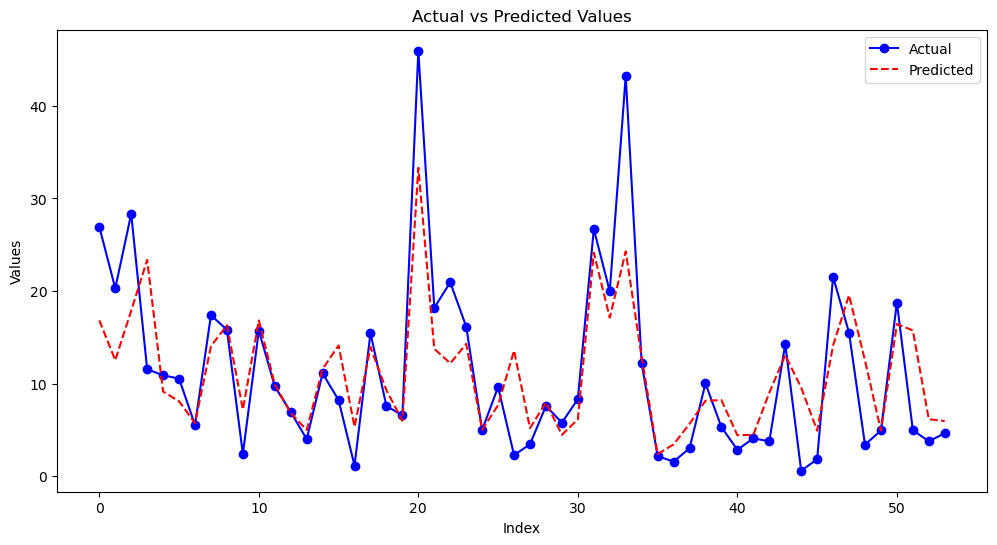

In [57]:
import matplotlib.pyplot as plt

# Assuming you have already created comparison_df as shown previously
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_df.reset_index(drop=True, inplace=True)

# Plotting the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual', color='blue', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


# MODEL INTERPRETATION

 The RMSE of 5.63 suggests that, on average, the model's predictions deviate from the actual values by about 5.63 percentage points.

 An R² value of 0.66 means that approximately 66% of the variance in the unemployment rate is explained by the model. This is a relatively good score, indicating that the model has a decent fit to the data.